In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics  import recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nettoyagedata import nettoyage


In [2]:
df=pd.read_csv(r"C:\Users\samya.taqi\Desktop\SAMYA TAQI\projet-de-classification-isFraud\Projet classification\data\data_train_set.csv", sep=";", decimal=",")
df

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,886490,42,PAYMENT,2281.91,C415059780,204420.00,202138.09,M835111535,0.00,0.00,0
1,341154,16,CASH_OUT,88417.05,C895332610,0.00,0.00,C409275226,224165.66,312582.71,0
2,265496,15,PAYMENT,3180.83,C579167791,0.00,0.00,M2132900258,0.00,0.00,0
3,343968,16,CASH_IN,1270.74,C1443913460,30995.00,32265.74,C73791399,2082102.79,1561646.22,0
4,590855,33,PAYMENT,6785.34,C586745981,11049.00,4263.66,M1025692211,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
806565,538785,21,CASH_IN,163835.65,C1298750155,17090.00,180925.65,C231329259,1668715.74,1504880.09,0
806566,717517,37,TRANSFER,1086792.33,C671671916,20648.00,0.00,C629443466,654273.06,1741065.39,0
806567,537812,21,CASH_OUT,19043.87,C1403091288,370.00,0.00,C1323988552,0.00,0.00,0
806568,911701,43,CASH_OUT,72922.23,C71143869,372.00,0.00,C1621169787,0.00,72922.23,0


In [3]:
data=nettoyage(df)
data

,transactionId,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,886490,42,PAYMENT,2281.91,204420.00,202138.09,0.00,0.00,0
1,341154,16,CASH_OUT,88417.05,0.00,0.00,224165.66,312582.71,0
2,265496,15,PAYMENT,3180.83,0.00,0.00,0.00,0.00,0
3,343968,16,CASH_IN,1270.74,30995.00,32265.74,2082102.79,1561646.22,0
4,590855,33,PAYMENT,6785.34,11049.00,4263.66,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
806565,538785,21,CASH_IN,163835.65,17090.00,180925.65,1668715.74,1504880.09,0
806566,717517,37,TRANSFER,1086792.33,20648.00,0.00,654273.06,1741065.39,0
806567,537812,21,CASH_OUT,19043.87,370.00,0.00,0.00,0.00,0
806568,911701,43,CASH_OUT,72922.23,372.00,0.00,0.00,72922.23,0


In [4]:
data=pd.get_dummies(data, columns=["type"], drop_first=True)
data=data.replace({True:1, False:0})
data

,transactionId,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,886490,42,2281.91,204420.00,202138.09,0.00,0.00,0,0,0,1,0
1,341154,16,88417.05,0.00,0.00,224165.66,312582.71,0,1,0,0,0
2,265496,15,3180.83,0.00,0.00,0.00,0.00,0,0,0,1,0
3,343968,16,1270.74,30995.00,32265.74,2082102.79,1561646.22,0,0,0,0,0
4,590855,33,6785.34,11049.00,4263.66,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
806565,538785,21,163835.65,17090.00,180925.65,1668715.74,1504880.09,0,0,0,0,0
806566,717517,37,1086792.33,20648.00,0.00,654273.06,1741065.39,0,0,0,0,1
806567,537812,21,19043.87,370.00,0.00,0.00,0.00,0,1,0,0,0
806568,911701,43,72922.23,372.00,0.00,0.00,72922.23,0,1,0,0,0


In [5]:
print(data.select_dtypes(include="object").dtypes)

type_CASH_OUT    object
type_DEBIT       object
type_PAYMENT     object
type_TRANSFER    object
dtype: object


In [6]:
x=data.drop("isFraud", axis=1)
y=data["isFraud"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [9]:
y_train_smote.value_counts()

isFraud
0    479983
1    239991
Name: count, dtype: int64

In [10]:
clf= GaussianNB()
clf.fit(x_train_smote, y_train_smote)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [11]:
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    320027
           1       0.23      0.86      0.36      2601

    accuracy                           0.98    322628
   macro avg       0.61      0.92      0.68    322628
weighted avg       0.99      0.98      0.98    322628



In [12]:
clf= GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    320027
           1       0.27      0.84      0.40      2601

    accuracy                           0.98    322628
   macro avg       0.63      0.91      0.70    322628
weighted avg       0.99      0.98      0.99    322628



In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [15]:
clf=RandomForestClassifier(n_estimators=100, random_state=0, min_samples_leaf=1, min_samples_split=2)
clf.fit(x_train_smote, y_train_smote)
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320027
           1       0.98      0.98      0.98      2601

    accuracy                           1.00    322628
   macro avg       0.99      0.99      0.99    322628
weighted avg       1.00      1.00      1.00    322628



In [22]:
from sklearn.model_selection import GridSearchCV



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.1],   
    

}

clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train_smote, y_train_smote)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

In [23]:
param_grid = {
    'n_estimators': [100,150],
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    
    
    
    

}

clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_smote, y_train_smote)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
print(classification_report(y_test, y_pred_smote))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\samya.taqi\Desktop\SAMYA TAQI\projet-de-classification-isFraud\Projet classification\fraudenv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 score:  0.9988615440378775
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320027
           1       0.98      0.98      0.98      2601

    accuracy                           1.00    322628
   macro avg       0.99      0.99      0.99    322628
weighted avg       1.00      1.00      1.00    322628



In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier


In [ ]:
clf=HistGradientBoostingClassifier(random_state=0)
clf.fit(x_train_smote, y_train_smote)
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320018
           1       0.65      0.99      0.78      2610

    accuracy                           1.00    322628
   macro avg       0.82      0.99      0.89    322628
weighted avg       1.00      1.00      1.00    322628



In [ ]:
param_grid = { 'max_iter': [100, 150],
               'max_depth': [3, 5, 7],
               'learning_rate': [0.01, 0.1, 0.2],  
               'min_samples_leaf': [20, 30, 40],
  

}

clf = HistGradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_smote, y_train_smote)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 150, 'min_samples_leaf': 20}
Best F1 score:  0.9961333586909387


In [ ]:
clf=HistGradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_iter=150, min_samples_leaf=20)
clf.fit(x_train_smote, y_train_smote)
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320018
           1       0.77      0.99      0.86      2610

    accuracy                           1.00    322628
   macro avg       0.88      0.99      0.93    322628
weighted avg       1.00      1.00      1.00    322628



In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf=XGBClassifier(random_state=0)
clf.fit(x_train_smote, y_train_smote)
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320018
           1       0.79      0.99      0.88      2610

    accuracy                           1.00    322628
   macro avg       0.90      0.99      0.94    322628
weighted avg       1.00      1.00      1.00    322628



In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    #'subsample': [0.6, 0.8, 1.0],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5], 
    #'eval_metric': ['logloss', 'auc']
    

}

clf = XGBClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           scoring='f1', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_smote, y_train_smote)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 1}
Best F1 score:  0.9964366287103609


In [ ]:
clf=XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=1)
clf.fit(x_train_smote, y_train_smote)
y_pred_smote=clf.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320018
           1       0.78      0.99      0.87      2610

    accuracy                           1.00    322628
   macro avg       0.89      0.99      0.94    322628
weighted avg       1.00      1.00      1.00    322628



# **matrice de corrélation**

In [17]:
df=pd.read_csv(r"C:\Users\samya.taqi\Desktop\SAMYA TAQI\projet-de-classification-isFraud\Projet classification\data\card_credit_fraud_Classification project Final.csv_sans_guillemets.csv", sep=";", decimal=",")
df

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
1008208,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
1008209,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
1008210,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
1008211,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [18]:
df=pd.get_dummies(df, columns=["type"], drop_first=True)
df=df.replace({True:1, False:0})    
df=nettoyage(df)

In [19]:
correlation_matrix = df.corr()
print(correlation_matrix)

                transactionId      step    amount  oldbalanceOrg  \
transactionId        1.000000  0.936726  0.228564       0.016474   
step                 0.936726  1.000000  0.275325       0.020461   
amount               0.228564  0.275325  1.000000       0.060774   
oldbalanceOrg        0.016474  0.020461  0.060774       1.000000   
newbalanceOrig      -0.015468 -0.016341  0.003006       0.995793   
oldbalanceDest      -0.007452 -0.010280  0.150262       0.089964   
newbalanceDest      -0.003760  0.002750  0.253078       0.064279   
isFraud              0.695909  0.798710  0.332146       0.023078   
type_CASH_OUT        0.029404  0.027133  0.057565      -0.205538   
type_DEBIT          -0.013377 -0.011810 -0.037374      -0.021488   
type_PAYMENT        -0.058334 -0.058935 -0.313453      -0.182596   
type_TRANSFER        0.093164  0.107810  0.437383      -0.076097   

                newbalanceOrig  oldbalanceDest  newbalanceDest   isFraud  \
transactionId        -0.015468       -0

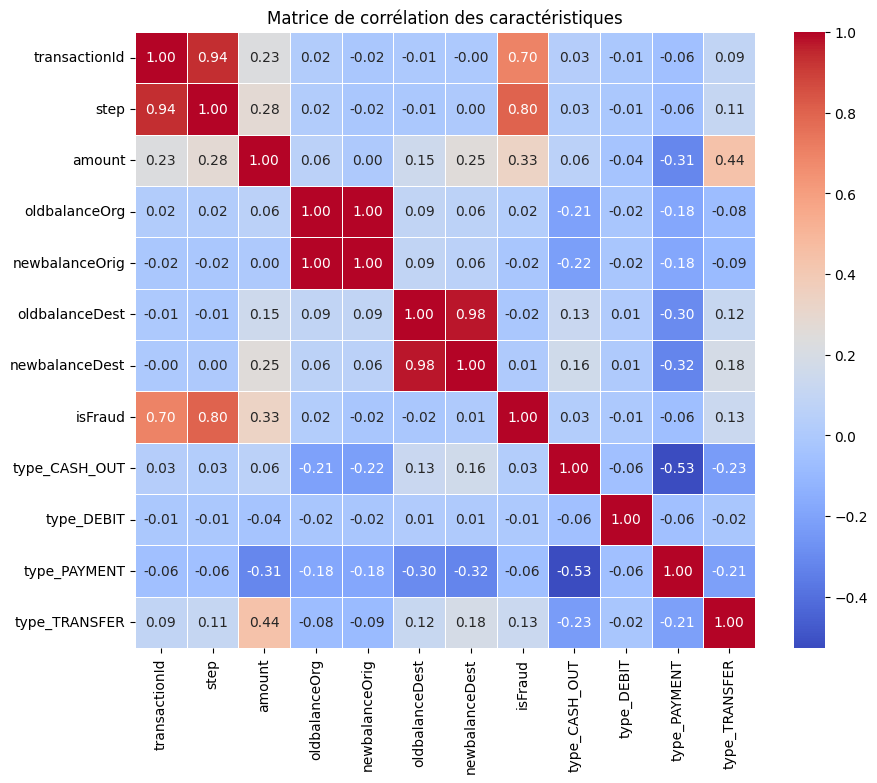

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des caractéristiques")
plt.show()